In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,A Lélek órása,1923
1,Aizaugusa gravi viegli krist,1986
2,Agliyorum,1988
3,0_1_0,2008
4,97 fung lau mung,1994


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,The Core,2003,Alejandro Abellan,actor,U.S.S. Soldier,NaN
1,Il momento di uccidere,1968,Remo De Angelis,actor,Dago,9
2,Across the Divide,1921,Thomas Delmar,actor,Dago,4
3,Revan,2012,Diego James,actor,Dago,NaN
4,Un homme marche dans la ville,1950,Fabien Loris,actor,Dago,12


In [72]:
# Define a year as a "Superman year"
# whose films feature more Superman characters than Batman.
# How many years in film history have been Superman years?

c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')]
c = c.groupby(['year', 'character']).size()
c = c.unstack()
c = c.fillna(0)
c.head()

character,Batman,Superman
year,,
1938,1,0
1940,1,0
1943,1,0
1948,0,1
1949,2,0


In [73]:
d = c.Superman - c.Batman
print('Superman years:')
print(len(d[d > 0.0]))

Superman years:
15


In [74]:
# How many years have been "Batman years",
# with more Batman characters than Superman characters?

print('Batman years:')
print(len(d[d < 0.0]))

Batman years:
23


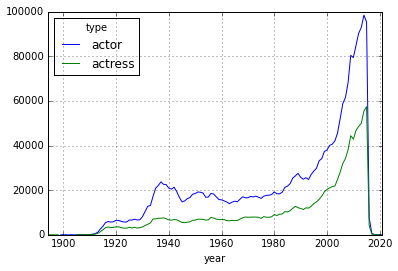

In [81]:
# Plot the number of actor roles each year
# and the number of actress roles each year
# over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot()

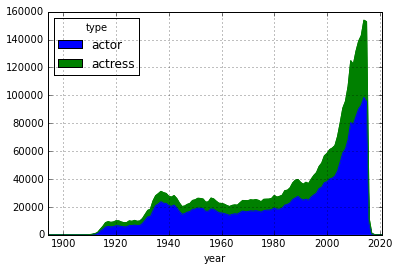

In [85]:
# Plot the number of actor roles each year
# and the number of actress roles each year,
# but this time as a kind='area' plot.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
c.plot(kind='area')

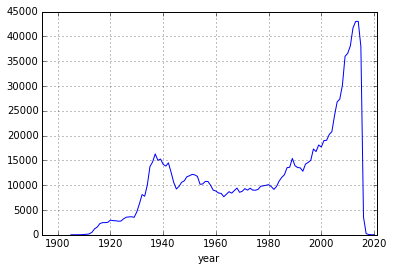

In [88]:
# Plot the difference between the number of actor roles each year
# and the number of actress roles each year over the history of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor - c.actress).plot()

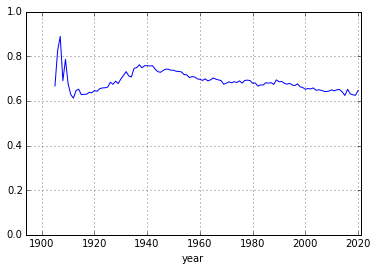

In [92]:
# Plot the fraction of roles that have been 'actor' roles
# each year in the hitsory of film.

c = cast
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

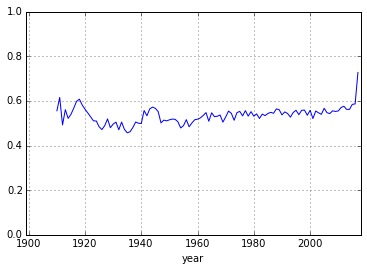

In [93]:
# Plot the fraction of supporting (n=2) roles
# that have been 'actor' roles
# each year in the history of film.

c = cast
c = c[c.n == 2]
c = c.groupby(['year', 'type']).size()
c = c.unstack('type')
(c.actor / (c.actor + c.actress)).plot(ylim=[0,1])

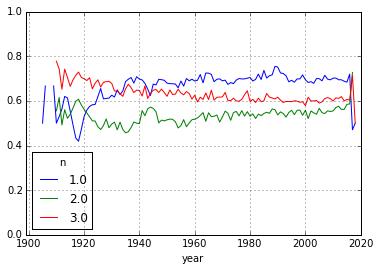

In [98]:
# Build a plot with a line for each rank n=1 through n=3,
# where the line shows what fraction of that rank's roles
# were 'actor' roles for each year in the history of film.

c = cast
c = c[c.n <= 3]
c = c.groupby(['year', 'type', 'n']).size()
c = c.unstack('type')
r = c.actor / (c.actor + c.actress)
r = r.unstack('n')
r.plot(ylim=[0,1])